In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import seaborn as sns 
import warnings
import numpy as np 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Admission_Predict.csv')

In [3]:
#Basics information
df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [4]:
print(f'Datasets contains {df.shape[0]} rows and {df.shape[1]} columns. ')

Datasets contains 400 rows and 9 columns. 


In [5]:
#Check null values 
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
#Check duplicated values 
df.duplicated().sum()

np.int64(0)

In [7]:
#Drop irrelevant features 
df=df.drop('Serial No.',axis=1)

In [8]:
X=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

In [9]:
#Feature Scaling. 
#Since we 'Research' column is a categorical variable then standard scaling is not applied.
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [10]:
sc=StandardScaler()
X[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']]=sc.fit_transform(X[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']])

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
lr=LinearRegression().fit(X_train,y_train)
svm=SVR().fit(X_train,y_train)
rf=RandomForestRegressor().fit(X_train,y_train)
gb=GradientBoostingRegressor().fit(X_train,y_train)

In [13]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gb.predict(X_test)

In [14]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [15]:

print(score1,score2,score3,score4)

0.8212082591486991 0.7535556883241172 0.806981435776111 0.7961065895326181


In [16]:
final_data=pd.DataFrame({'Models':['LR','SVR','RF','GB'],
                        'R2_Score':[score1,score2,score3,score4]})

<Axes: xlabel='Models', ylabel='R2_Score'>

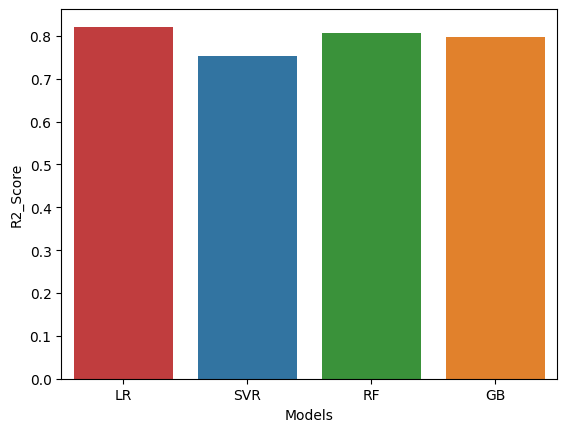

In [17]:
sns.barplot(data=final_data,x=final_data['Models'],y=final_data['R2_Score'],hue='R2_Score',legend=False,palette='tab10')

In [18]:
#Now the same problem,but this time as  a classification problem 

In [19]:
y_train=[1 if value>0.8 else 0 for value in y_train]
y_test=[1 if value>0.8 else 0 for value in y_test]

y_train=np.array(y_train)
y_test=np.array(y_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [21]:
log=LogisticRegression().fit(X_train,y_train)
y_pred5=log.predict(X_test)
score5=accuracy_score(y_test,y_pred5)

In [22]:
sv=svm.SVC().fit(X_train,y_train)
y_pred6=sv.predict(X_test)
score6=accuracy_score(y_test,y_pred6)

In [23]:
knn=KNeighborsClassifier().fit(X_train,y_train)
y_pred7=knn.predict(X_test)
score7=accuracy_score(y_test,y_pred7)

In [24]:
rfc=RandomForestClassifier().fit(X_train,y_train)
y_pred8=rfc.predict(X_test)
score8=accuracy_score(y_test,y_pred8)

In [25]:
gr=GradientBoostingClassifier().fit(X_train,y_train)
y_pred9=gr.predict(X_test)
score9=accuracy_score(y_test,y_pred9)

In [26]:
final_data1=pd.DataFrame({'Models':['Log','SVM','KNN','RFC','GBC'],
                         'ACC_Score':[score5,score6,score7,score8,score9]})

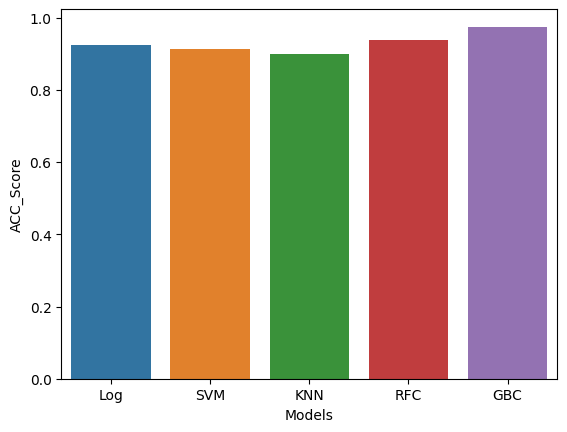

In [27]:
sns.barplot(data=final_data1,x='Models',y='ACC_Score',hue='Models',legend=False);

In [28]:
#Final Model
y=[1 if value>0.8 else 0 for value in y]
model=GradientBoostingClassifier().fit(X,y)

In [29]:
#We try to predict the following values 
new_data = [337, 118, 4, 4.5, 4.5, 9.65, 1]
new_data_df = pd.DataFrame(new_data, index=X.columns).T

In [30]:
scaler_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
scaled_new_data_df = pd.DataFrame(sc.transform(new_data_df[scaler_columns].values), columns=scaler_columns, index=[0])
new_data_scaled = pd.concat([scaled_new_data_df, new_data_df['Research']], axis=1)

In [31]:
model.predict(new_data_scaled)

array([1])